In [1]:
# Imports
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
# Pandas Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [25]:
# Import CSV
inital_slice = pd.read_csv('240112_150239_Slice1.csv')
middle_slice = pd.read_csv('240112_150239_Slice397.csv')
final_slice = pd.read_csv('240112_150239_Slice793.csv')

overall = pd.read_csv('240112_150239_averages.csv_Zone_Overall.csv')

In [4]:
# Merge Databases

def merge(): # Check merging error when plotting data
    half_merged = pd.merge(final_slice, middle_slice, how='right')
    fully_merged = pd.merge(half_merged, inital_slice, how='outer')

    return fully_merged

merged_df = merge()

C:\Users\ianmh\AppData\Local\Temp\ipykernel_10108\2393772343.py:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  fully_merged = pd.merge(half_merged, inital_slice, how='outer')


In [5]:
# Clean Up Merged DF

# Tile position can be used for a visualtion in real space but is outside of the scope for this project
merged_df = merged_df.drop(columns = ['TileX', 'TileZ'])

merged_with_date = merged_df

merged_df = merged_df.drop(columns = ['Age']) # Can drop for specific to remove dupes in certine cases, but age can be used for visulizations

merged_df.drop_duplicates(inplace=True) # Takes df from 1430 rows to 109 (the removed data is duplicate "animals" with separate ages and tiles positions)

109


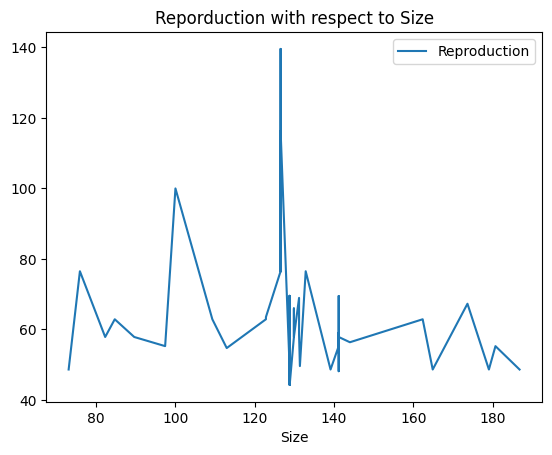

,Creature name,Avatar,Biome,Food per Turn,Max Hunger,Water per Turn,Max Thirst,Reproduction Interval,Lifespan,Courage,Intimidation,Perception,Reproduction,Size,Speed,Stealth,Territory,algae,fruit,grass,leaves,meat,nectar,pollen,sap,seeds,wood
1001,Glyfadile,Pygmy_Hog,Tropical Rainforest,6.349984,438.4233,12.699970,438.4233,30.43353,626.0961,98.32845,89.35395,79.58841,48.60841,73.07056,36.18665,22.125910,32.01307,0.0,1.490116e-08,0.2,0.3,0.3,0.0,1.000000e-01,0.000000e+00,0.000000e+00,0.0
999,Glyfadile,Pygmy_Hog,Tropical Rainforest,6.349984,438.4233,12.699970,438.4233,17.26494,355.1843,98.32845,89.35395,79.58841,48.60841,73.07056,36.18665,22.125910,32.01307,0.0,1.490116e-08,0.2,0.3,0.3,0.0,1.000000e-01,0.000000e+00,0.000000e+00,0.0
1424,Wertousaur,European_Badger,Tropical Rainforest,2.494706,301.8961,4.989413,301.8961,74.02616,967.7577,111.29940,21.54067,131.52160,76.49245,75.91006,27.82482,32.649340,56.42659,-0.1,3.000000e-01,-0.1,0.3,0.4,0.0,1.490116e-08,1.490116e-08,1.490116e-08,0.1
0,Blaergotite,Pygmy_Hog,Tropical Rainforest,7.242233,493.7073,14.484470,493.7073,27.52491,475.9070,299.92870,48.39159,71.80426,57.83673,82.28455,43.41476,7.825413,48.85268,0.0,-9.999999e-02,0.0,0.5,0.5,0.0,-9.999999e-02,0.000000e+00,0.000000e+00,0.1
989,Flywisaur,European_Badger,Tropical Rainforest,6.839653,508.1907,13.679310,508.1907,33.47398,532.4655,299.92870,31.55973,44.66128,62.86602,84.69846,43.41476,13.840170,48.85268,0.0,-9.999999e-02,0.0,0.5,0.5,0.0,-9.999999e-02,0.000000e+00,0.000000e+00,0.1


In [ ]:
# Testing and Visualations

print(len(merged_df))

# Idea 1: Graph (row) based on biome grouping (could be a cluster graph to show multiple biomes)

# Idea 2: Size vs. Reproduction
size_sorted_df = merged_df.sort_values(by=['Size'])

size_sorted_df.plot(x='Size', y='Reproduction', kind='line', title='Reporduction with respect to Size', legend=True)

plt.show()

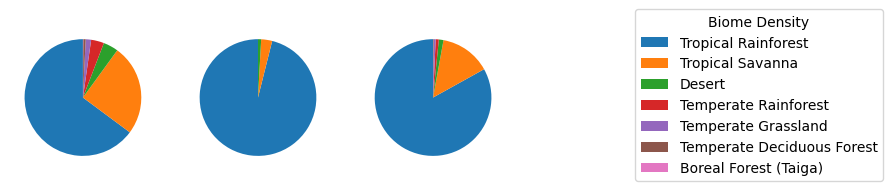

In [ ]:
# Pie Chart Visualization for biomes

intial_counts = inital_slice['Biome'].value_counts() # this is a dict
middle_counts = middle_slice['Biome'].value_counts() # this is a dict
final_counts = final_slice['Biome'].value_counts() # this is a dict

labels = list(intial_counts.keys())

fig, axs = plt.subplots(1, 3)

wedges, _ = axs[0].pie(
    intial_counts, startangle=90
)

_, _ = axs[1].pie(
    middle_counts, startangle=90
)

_, _ = axs[2].pie(final_counts, startangle=90)

fig.legend(wedges, labels, title="Biome Density", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

,Creature name,Avatar,Biome,Food per Turn,Max Hunger,Water per Turn,Max Thirst,Reproduction Interval,Age,Lifespan,Courage,Intimidation,Perception,Reproduction,Size,Speed,Stealth,Territory,algae,fruit,grass,leaves,meat,nectar,pollen,sap,seeds,wood
0,Flywisaur,European_Badger,Tropical Rainforest,6.839653,508.1907,13.67931,508.1907,33.47398,210,532.4655,299.9287,31.55973,44.66128,62.86602,84.69846,43.41476,13.84017,48.85268,0.0,-0.1,0.0,0.5,0.5,0.0,-0.1,0.0,0.0,0.1


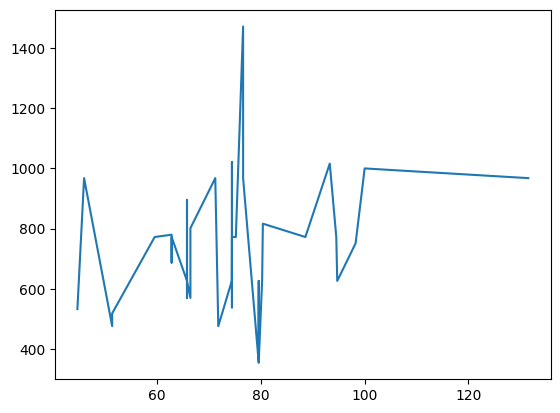

In [8]:
# cont but just another graph

# Idea: bubble plot of biomes about lifespan and courage

lifespan_sorted_graph = merged_with_date.sort_values(by=['Perception'])

lifespan_sorted_graph = lifespan_sorted_graph.reset_index(drop=True)

#plt.scatter(tropical_rainforest['Lifespan'], tropical_rainforest['Size'])

plt.plot(lifespan_sorted_graph['Perception'], lifespan_sorted_graph['Lifespan'])

#plt.show()

lifespan_sorted_graph.head(1)

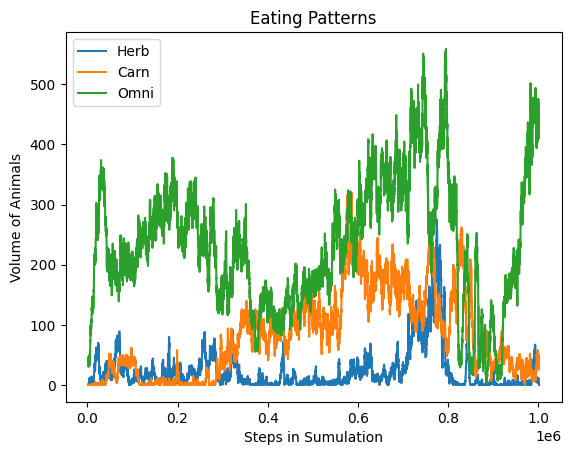

In [39]:
# Graph visualizing eating patterns over the epochs

# remove first turn
overall = overall[3:]

fig, ax = plt.subplots()

ax.plot(overall['Turn'], overall['Herbivores'])
ax.plot(overall['Turn'], overall['Carnivores'])
ax.plot(overall['Turn'], overall['Omnivores'])

plt.title("Eating Patterns")
plt.ylabel('Volume of Animals')
plt.xlabel('Steps in Sumulation')

plt.legend(['Herb', 'Carn', 'Omni'])

plt.show()
